In [4]:
import sys
print(sys.path)

['/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/droidmaldetect_py/Dataset2017/notebook', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/.venv/lib/python3.11/site-packages', '/home/lpazc/Documentos/Proyects/DroidMalDetect-Py']


In [5]:
import pandas as pd
import os
import dotenv
dotenv.load_dotenv()


True

In [6]:
# TODO: Columns that can be removed for column correlation analysis
# TODO: The initial version may change due to the relationship between the variables

datasets_malware = [
    {"path": ["dataset/2017_dataset/Adware"], "class":"Adware"},
    {"path": ["dataset/2017_dataset/Benign"], "class":"Benign"},
    {"path": ["dataset/2017_dataset/Ransomware"], "class":"Ransomware"},
    {"path": ["dataset/2017_dataset/Scareware"], "class":"Scareware"},
    {"path": ["dataset/2017_dataset/SMSmalware"], "class":"SMSmalware"},
]

In [24]:
abs_path_result = os.getenv('FOLDER_RESULT')
categories =  ["".join([category['class'].upper(), '.csv']) for category in datasets_malware]
column_to_delete = ["Source IP", "Destination IP", "Timestamp", "Label"]

categories

['ADWARE.csv',
 'BENIGN.csv',
 'RANSOMWARE.csv',
 'SCAREWARE.csv',
 'SMSMALWARE.csv']

In [45]:
dataframe_general =  pd.DataFrame()
for category in categories:
    csv_path = os.path.join(abs_path_result, category)
    temp_dataframe: pd.DataFrame =  pd.read_csv(csv_path, index_col=False)
    print(category)
    dataframe_general =  pd.concat([dataframe_general, temp_dataframe], ignore_index=True)

ADWARE.csv
BENIGN.csv
RANSOMWARE.csv
SCAREWARE.csv
SMSMALWARE.csv


In [46]:
dataframe_general.dtypes

Source IP            object
Source Port         float64
Destination IP       object
Destination Port    float64
Protocol            float64
                     ...   
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
Label                object
Length: 84, dtype: object

In [47]:
dataframe_general['category'] = dataframe_general.Label.apply(lambda category:  1 if 'BENIGN' in category else 0)

<Axes: >

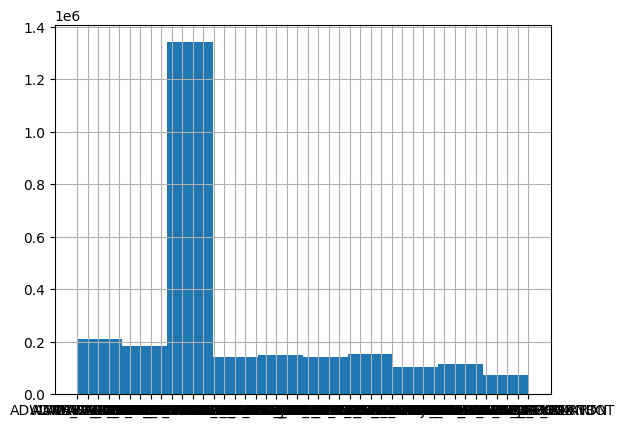

In [48]:
dataframe_general.Label.hist()

In [50]:
dataframe_general['category'].hist()

KeyError: 'Category'

In [39]:
dataframe_general.dtypes

Source IP            object
Source Port         float64
Destination IP       object
Destination Port    float64
Protocol            float64
                     ...   
Idle Std            float64
Idle Max            float64
Idle Min            float64
Label                object
Category              int64
Length: 85, dtype: object

In [37]:
not_numeric_columns =  dataframe_general.select_dtypes(exclude=['int', 'float'])

In [38]:
not_numeric_columns

,Source IP,Destination IP,Timestamp,Label
0,31.13.71.1,10.42.0.151,14/06/2017 04:26:15,ADWARE_SHUANET
1,10.42.0.151,31.13.71.1,14/06/2017 04:26:15,ADWARE_SHUANET
2,10.42.0.151,31.13.71.1,14/06/2017 04:26:15,ADWARE_SHUANET
3,10.42.0.151,172.217.6.237,14/06/2017 04:26:15,ADWARE_SHUANET
4,10.42.0.151,172.217.6.237,14/06/2017 04:26:16,ADWARE_SHUANET
...,...,...,...,...
229270,10.42.0.151,192.229.163.180,30/06/2017 04:42:24,SMSMALWARE_BEANBOT
229271,10.42.0.151,10.42.0.1,30/06/2017 04:17:44,SMSMALWARE_BEANBOT
229272,54.239.17.112,10.42.0.151,30/06/2017 04:34:17,SMSMALWARE_BEANBOT
229273,10.42.0.151,10.42.0.1,30/06/2017 04:15:34,SMSMALWARE_BEANBOT


In [38]:
dataframe_general.to_csv(os.path.join(abs_path_result, 'general_malware.csv'), index=False)